# The ROC

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
import catboost as cb

### Import data

In [2]:
X_train_s = np.load('data/X_train_s.npy')
X_test_s = np.load('data/X_test_s.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')

feature_names = np.load('data/feature_names.npy')

### Initializing all models for comparison

In [9]:
dt = tree.DecisionTreeClassifier(min_samples_split=35, 
                                 min_samples_leaf=5, 
                                 max_leaf_nodes=356, 
                                 max_depth=20, 
                                 criterion='entropy', 
                                 class_weight=None)

rf = RandomForestClassifier( min_samples_split=11, 
                             min_samples_leaf=2, 
                             max_depth=24, 
                             criterion='entropy', 
                             class_weight=None,
                             max_leaf_nodes=1570,
                             n_estimators=13,
                             n_jobs=-1)

knn = KNeighborsClassifier(n_neighbors=6, 
                           p=1, 
                           weights='distance', 
                           n_jobs=-1)

nb = naive_bayes.GaussianNB()

lr = LogisticRegression(
    C=100,
    tol=.01,
    class_weight=None,
    fit_intercept=False,
    l1_ratio=1.0,
    max_iter=1000,
    penalty='elasticnet',
    solver='saga'
)

svm = SVC(kernel='rbf', 
          probability=True)

cat =  cb.CatBoostClassifier(learning_rate= 0.04, 
                             l2_leaf_reg= 1, 
                             iterations= 150, 
                             depth= 10, verbose=0)

ada = AdaBoostClassifier(n_estimators= 97, 
                         learning_rate= 1, 
                         algorithm= 'SAMME.R')

XGB = xgb.XGBClassifier(subsample= 1.0, 
                        n_estimators= 73,
                        max_depth= None, 
                        colsample_bytree= 1.0, 
                        alpha= 1,
                        eval_metric='logloss', verbose=0)

In [13]:
models = [
{
    'label': 'Random Forest',
    'model': rf,
},
{
    'label': 'Naive Bayes',
    'model': nb,    
},
{
    'label': 'Logistics Regression',
    'model': lr,    
},
{
    'label': 'Decision Tree',
    'model': dt,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'CAT',
    'model': cat,
},
{
    'label': 'ADA',
    'model': ada,
},
{
    'label': 'XGB',
    'model': XGB,
}
]

In [14]:
def plot_roc():
    plt.figure(figsize=(12,8))

    # Below for loop iterates through your models list
    for m in models:
        model = m['model'] # select the model
        model.fit(X_train_s, y_train) # train the model verbose=False
        y_pred=model.predict(X_test_s) # predict the test data

        # Compute False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_s)[:,1])
        # Calculate Area under the curve to display on the plot
        auc = metrics.roc_auc_score(y_test,model.predict(X_test_s))
        # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

    # Custom settings for the plot
    plt.plot([0, 1], [0, 1],'r--',label='No Skill')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()   # Display

### The ROC Curves

/Users/davidmaciulis/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:57:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




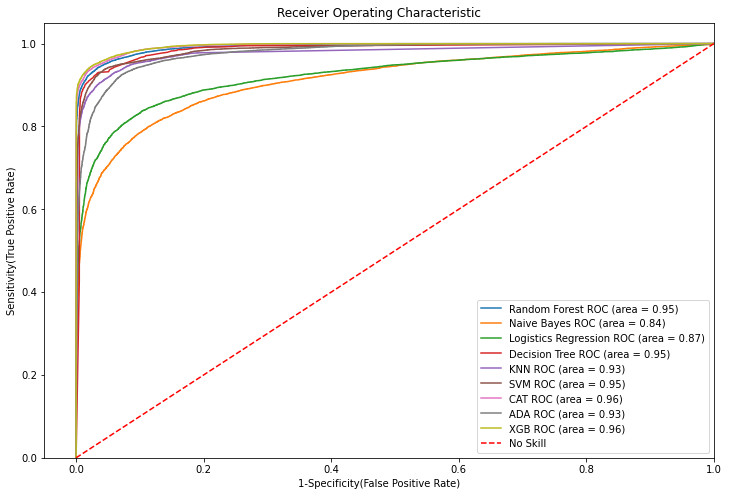

CPU times: user 23min 31s, sys: 11.9 s, total: 23min 43s
Wall time: 18min 2s


In [15]:
%time plot_roc()

The ensamble decision trees are clear winners in terms of perfomance since their ROC area under the curve is the largest. SVM and KNN 